## EDA (Exploratory Data Analysis) 
### 1. Visualization
#### 1.1 Matplotlib
#### 1.2 Seaborn
#### 1.3 Bokeh
### 2. Exploring the data 
#### 2.1 Descriptive Statistics
#### 2.2 Categorical Data
### 3. Extra reading

### 1. Visualization

#### 1.1 Matplotlib

Matplotlib and its pyplot interface allows us to perform different types of plots for data science. 

First visualizations with plotly is quick:

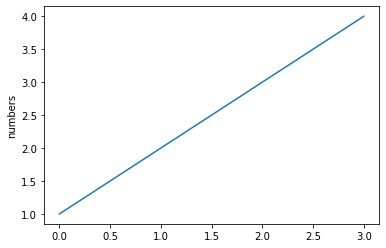

In [1]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('numbers')
plt.show() # Notice the default x axis values: 0, 1, 2, 3

plot is a versatile function, and will take an arbitrary number of arguments. For example, to plot x versus y, you can write:

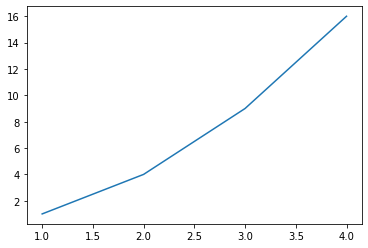

In [2]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])


#### Formatting the style of your plot
An optional third argument is the format string that indicates the color and line type of the plot. You can concatenate color letters and line style string. The default format string is 'b-', which is a solid blue line. For example, to plot the above with red circles, you would use

#### the axis function: 
Takes a list of [xmin, xmax, ymin, ymax] and specifies the viewport of the axes.

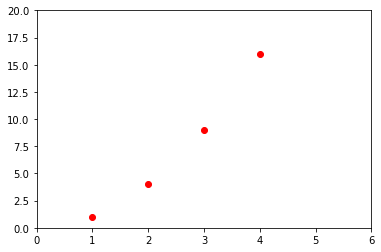

In [3]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

#### Internally matplotlib uses numpy arrays.
Example with different plots using numpy arrays:


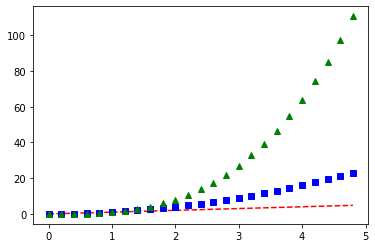

In [4]:
import numpy as np

# sampling at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

See https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D for more information about line properties: linewidth, dash style, antialiased, etc

#### Plotting with categorical variables


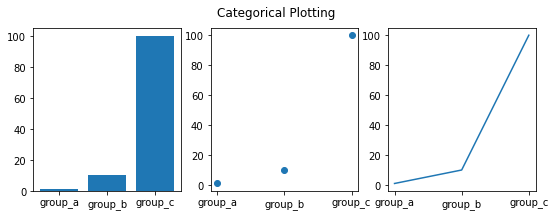

In [5]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

### Working with multiple figures and axes


Pyplot has the concept of the current figure and the current axes. All plotting functions apply to the current axes. The function `gca` returns the current axes (a matplotlib.axes.Axes instance), and `gcf` returns the current figure (a matplotlib.figure.Figure instance).

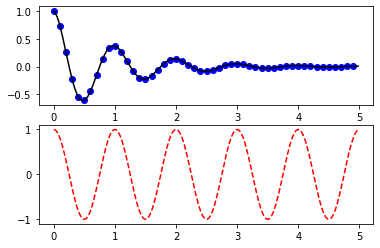

In [6]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

The `subplot` call specifies `numrows, numcols, plot_number` where `plot_number` ranges from 1 to `numrows*numcols`. The commas in the `subplot` call are optional if `numrows*numcols<10`. So `subplot(211)` is identical to `subplot(2, 1, 1)`.

#### Working with text

`text` can be used to add text in an arbitrary location, and xlabel, ylabel and title are used to add text in the indicated locations. See https://matplotlib.org/stable/tutorials/text/text_intro.html for more details.

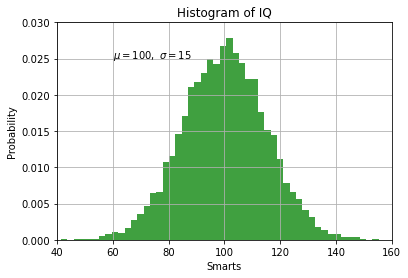

In [7]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

#### Annotating text

Use `annotate` to provide annotations in specific locations. In an annotation, there are two points to consider: the location being annotated represented by the argument `xy` and the location of the text `xytext`. Both of these arguments are `(x, y)` tuples.

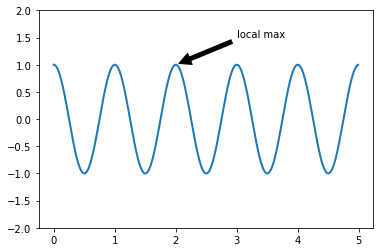

In [8]:
ax = plt.subplot()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()

#### 1.2 Seaborn

In [9]:
import seaborn as sns

First example of plot. Relationships in the tips dataset. 

In [10]:
# Apply the default theme (darkgrid). #other themes are whitegrid, dark, white, and ticks
sns.set_theme()

In [11]:
# Load an example dataset
tips = sns.load_dataset("tips")

In [12]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


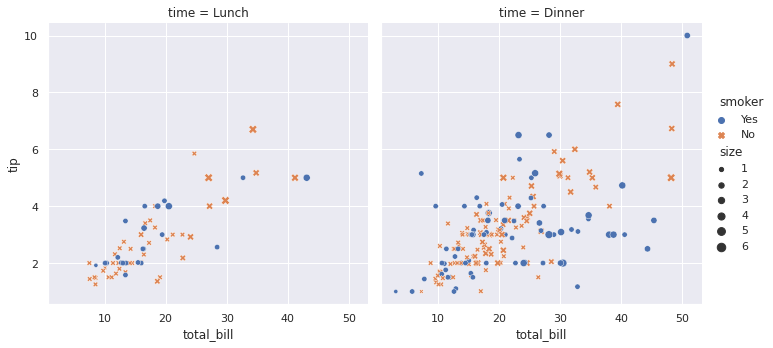

In [13]:
# Create a visualization of relationships
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

#hue: division of color per category
#style: different figure shapes


#### Statistical estimation

Also we can visualize the average value of one variable as a function of other variables. When statistical values are estimated, seaborn will use bootstrapping to compute confidence intervals and draw error bars representing the uncertainty of the estimate.

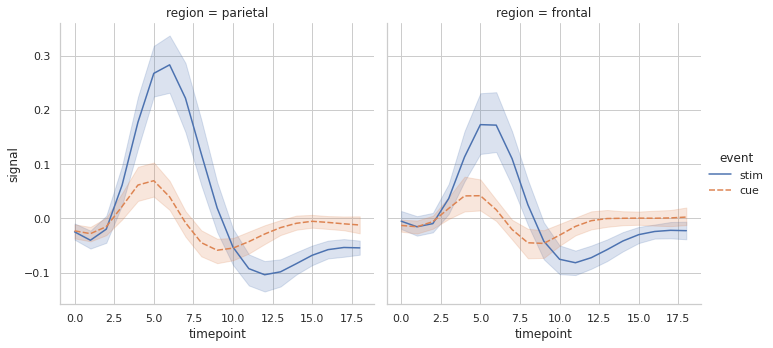

In [14]:
sns.set_style('whitegrid')
fmri = sns.load_dataset("fmri")
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

Statistical estimation in seaborn goes beyond descriptive statistics. For example, it is possible to enhance a scatterplot by including a linear regression model (and its uncertainty) using `lmplot()`:

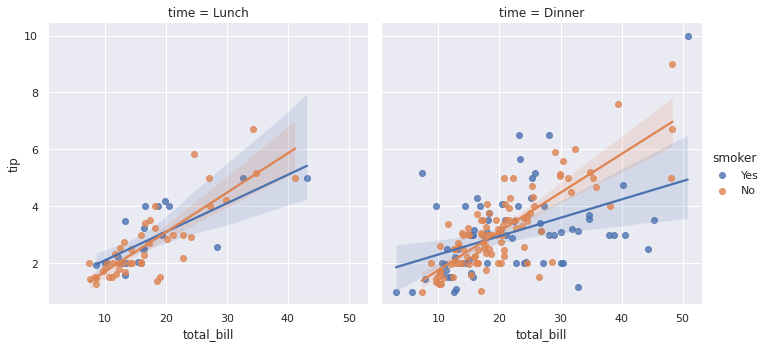

In [15]:
sns.set_style('darkgrid')
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")


#### Distribution visualization

 The seaborn function `displot()` supports several approaches to visualizing distributions. These include classic techniques like histograms and computationally-intensive approaches like kernel density estimation:

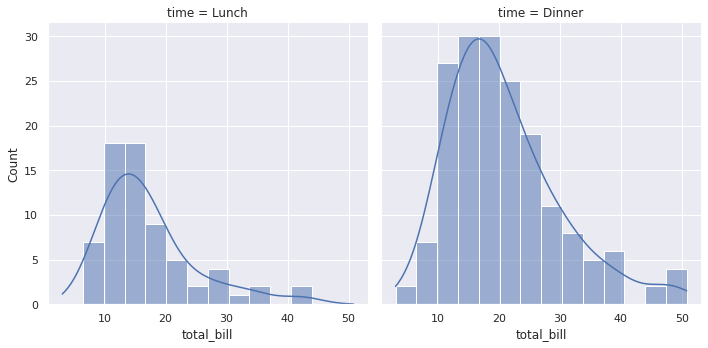

In [16]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)


Example for calculating and plotting the empirical cumulative distribution function of the data:

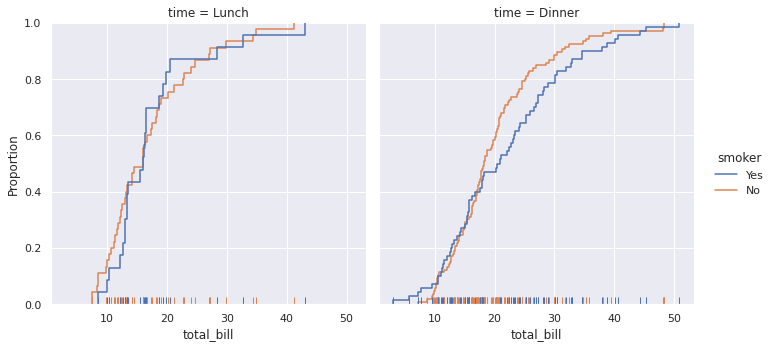

In [17]:
sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=True)


#### Plots for categorical data


“swarm” plot: a scatter plot that adjusts the positions of the points along the categorical axis so that they don’t overlap:

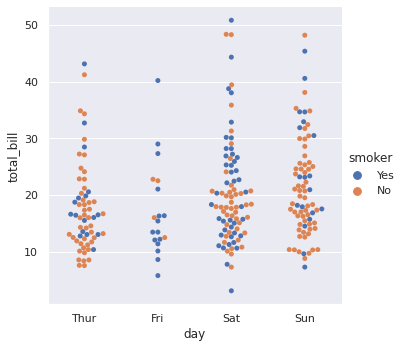

In [18]:
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")


Also you cna use de kernel density estimation

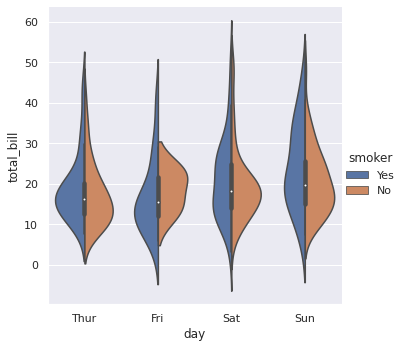

In [19]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)


Example using the mean value and its confidence interval

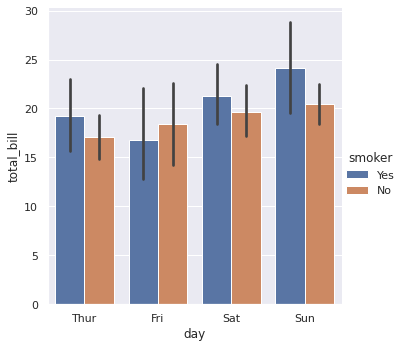

In [20]:
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")


#### Multivariate views on complex datasets


Some seaborn functions combine multiple kinds of plots to quickly give informative summaries of a dataset. One, `jointplot()`, focuses on a single relationship. It plots the joint distribution between two variables along with each variable’s marginal distribution:

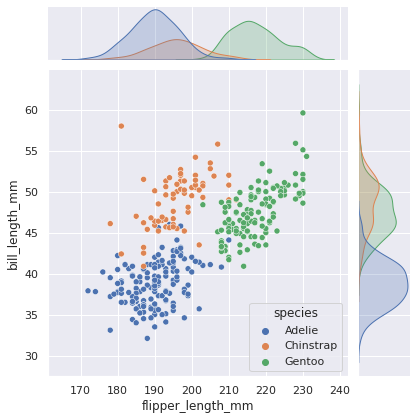

In [21]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

`pairplot()`, takes a broader view: it shows joint and marginal distributions for all pairwise relationships and for each variable, respectively:

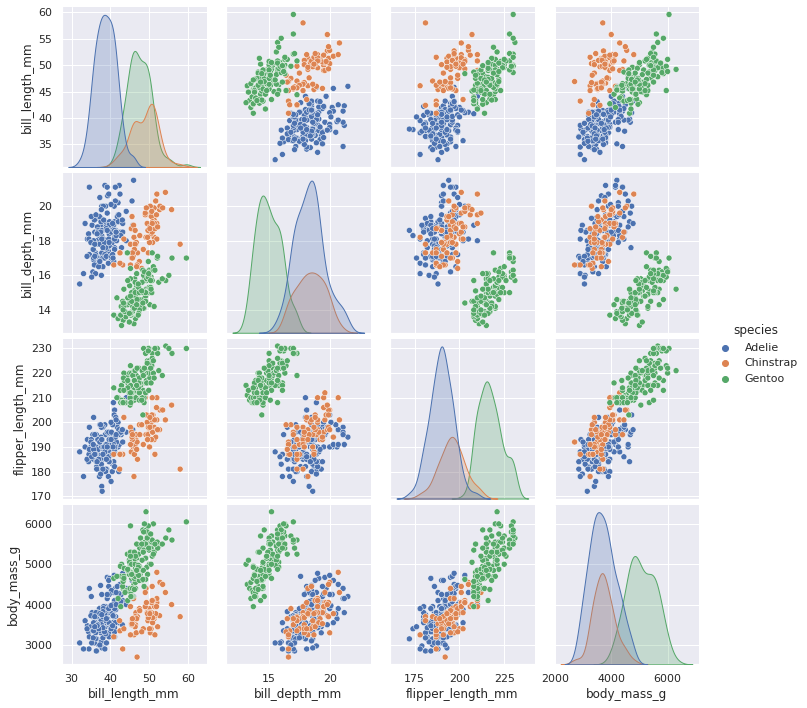

In [22]:
sns.pairplot(data=penguins, hue="species")


#### 1.3 Bokeh

In [23]:
from bokeh.io import output_notebook, show


In [24]:
output_notebook()


Loading BokehJS ...

In [25]:
#Import the required packages
from bokeh.io import output_notebook, output_file, show
from bokeh.plotting import figure

In [26]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [27]:
# Create plot
plot = figure(width=400, height=400, title="Simple line plot", x_axis_label="x-axis", y_axis_label = 'y-axis')
plot.line(x,y, line_width=2, color='green')


GlyphRenderer(id='1040', ...)

In [28]:

#Show plot
output_file("line_plot1.html")
show(plot)

In [29]:
from bokeh.plotting import figure, show

animals = ['lion', 'leopard', 'elephant', 'rhino', 'buffalo']
weight_tonnes = [190, 90, 3000, 2300, 590]

p = figure(x_range=animals, height=350, title="Big Five weight", x_axis_label = "Animal", y_axis_label = "Weight",
           toolbar_location=None, tools="")

p.vbar(x=animals, top=weight_tonnes, width=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

### 2. Exploring the data 


#### 2.1 Descriptive Statistics


Summary or descriptive statistics include the mean, quartiles, and standard deviation. The `.describe`
method will calculate these measures on all of the numeric columns in a DataFrame.

In [30]:
import pandas as pd
import numpy as np

In [31]:
fueleco = pd.read_csv("vehicles.csv.zip")

/home/saul/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3106: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [32]:
fueleco

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39096,14.982273,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
39097,14.330870,0.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
39098,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
39099,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [33]:
fueleco.mean()

barrels08             17.442712
barrelsA08             0.219276
charge120              0.000000
charge240              0.029630
city08                18.077799
city08U                5.040648
cityA08                0.569883
cityA08U               0.416097
cityCD                 0.000560
cityE                  0.225181
cityUF                 0.000975
co2                   72.538989
co2A                   5.543950
co2TailpipeAGpm       17.826864
co2TailpipeGpm       470.704841
comb08                20.323828
comb08U                5.652724
combA08                0.631160
combA08U               0.453725
combE                  0.230912
combinedCD             0.000459
combinedUF             0.000959
cylinders              5.729105
displ                  3.309829
engId               8582.377382
feScore                0.122580
fuelCost08          2242.470781
fuelCostA08           91.335260
ghgScore               0.120866
ghgScoreA             -0.923889
highway08             24.208588
highway0

In [34]:
fueleco.std()

barrels08              4.580230
barrelsA08             1.143837
charge120              0.000000
charge240              0.487408
city08                 6.970672
city08U               10.462790
cityA08                4.297124
cityA08U               4.093495
cityCD                 0.045392
cityE                  3.180894
cityUF                 0.022785
co2                  163.252019
co2A                  55.956932
co2TailpipeAGpm       93.937414
co2TailpipeGpm       122.351021
comb08                 6.882807
comb08U               11.231748
combA08                4.395797
combA08U               4.131767
combE                  3.244463
combinedCD             0.040759
combinedUF             0.022392
cylinders              1.754487
displ                  1.361925
engId              17606.675590
feScore                2.516348
fuelCost08           601.273869
fuelCostA08          479.485802
ghgScore               2.512612
ghgScoreA              0.651017
highway08              7.128070
highway0

In [35]:
fueleco.describe()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
count,39101.000000,39101.000000,39101.0,39101.000000,39101.000000,39101.000000,39101.000000,39101.000000,39101.000000,39101.000000,...,39101.000000,39101.000000,39101.000000,39101.000000,39101.000000,39101.000000,39101.000000,39101.000000,39101.000000,39101.000000
mean,17.442712,0.219276,0.0,0.029630,18.077799,5.040648,0.569883,0.416097,0.000560,0.225181,...,22.789421,0.723139,33.884375,1.009562,2000.635406,-3459.572645,0.005869,0.094703,0.094269,0.094141
std,4.580230,1.143837,0.0,0.487408,6.970672,10.462790,4.297124,4.093495,0.045392,3.180894,...,9.827224,5.965565,10.399308,6.642943,10.690422,3010.284617,0.165399,2.279478,2.191115,2.226500
min,0.060000,0.000000,0.0,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1984.000000,-26500.000000,0.000000,0.000000,0.000000,0.000000
25%,14.330870,0.000000,0.0,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.000000,0.000000,27.370400,0.000000,1991.000000,-4750.000000,0.000000,0.000000,0.000000,0.000000
50%,17.347895,0.000000,0.0,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.111100,0.000000,33.000000,0.000000,2001.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000
75%,20.115000,0.000000,0.0,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,25.475600,0.000000,38.600000,0.000000,2010.000000,-1500.000000,0.000000,0.000000,0.000000,0.000000
max,47.087143,18.311667,0.0,12.000000,150.000000,150.000000,145.000000,145.083500,5.350000,122.000000,...,224.800000,207.262200,182.700000,173.143600,2018.000000,5250.000000,7.000000,97.000000,81.000000,88.000000


In [36]:
# Including the object will add non numeric data types

In [37]:
fueleco.describe(include=object)

,drive,eng_dscr,fuelType,fuelType1,make,model,mpgData,trany,VClass,guzzler,...,atvType,fuelType2,rangeA,evMotor,mfrCode,c240Dscr,c240bDscr,createdOn,modifiedOn,startStop
count,37912,23431,39101,39101,39101,39101,39101,39090,39101,2335,...,3204,1490,1485,644,8289,53,51,39101,39101,7405
unique,7,545,14,6,134,3816,2,37,34,3,...,8,4,216,125,46,5,4,195,68,2
top,Front-Wheel Drive,(FFS),Regular,Regular Gasoline,Chevrolet,F150 Pickup 2WD,N,Automatic 4-spd,Compact Cars,G,...,FFV,E85,290,288V Ni-MH,GMX,standard charger,80 amp dual charger,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,N
freq,13653,8827,25620,26931,3900,214,26400,11045,5661,1356,...,1383,1383,74,117,1255,42,42,34199,29438,5176


In [38]:
# Information of dtypes
fueleco.dtypes

barrels08     float64
barrelsA08    float64
charge120     float64
charge240     float64
city08          int64
               ...   
modifiedOn     object
startStop      object
phevCity        int64
phevHwy         int64
phevComb        int64
Length: 83, dtype: object

In [39]:
fueleco.dtypes.value_counts()
# object type: column as categorical or strings (these can be
# missing values with the float64 type)

float64    32
int64      27
object     23
bool        1
dtype: int64

In [40]:
# We can get also memory usage info
fueleco[["city08", "comb08"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39101 entries, 0 to 39100
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   city08  39101 non-null  int64
 1   comb08  39101 non-null  int64
dtypes: int64(2)
memory usage: 611.1 KB


In [41]:
# And we can change the precision to reduce memory usage 

In [42]:
fueleco[["city08", "comb08"]].assign(
city08=fueleco.city08.astype(np.int16),
comb08=fueleco.comb08.astype(np.int16),
).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39101 entries, 0 to 39100
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   city08  39101 non-null  int16
 1   comb08  39101 non-null  int16
dtypes: int16(2)
memory usage: 152.9 KB


#### 2.2 Categorical Data

In [43]:
# We will explore quantifying and visualizing categorical data.

In [44]:
fueleco.select_dtypes(object).columns

Index(['drive', 'eng_dscr', 'fuelType', 'fuelType1', 'make', 'model',
       'mpgData', 'trany', 'VClass', 'guzzler', 'trans_dscr', 'tCharger',
       'sCharger', 'atvType', 'fuelType2', 'rangeA', 'evMotor', 'mfrCode',
       'c240Dscr', 'c240bDscr', 'createdOn', 'modifiedOn', 'startStop'],
      dtype='object')

In [45]:
# nunique to dtermine cardinality
fueleco.drive.nunique()

7

In [46]:
# use .sample to see some of the values:
fueleco.drive.sample(5, random_state=42)

4217     4-Wheel or All-Wheel Drive
1736     4-Wheel or All-Wheel Drive
36029              Rear-Wheel Drive
37631             Front-Wheel Drive
1668               Rear-Wheel Drive
Name: drive, dtype: object

In [47]:
# Determine the number and percent of missing values:
fueleco.drive.isna().sum()
fueleco.drive.isna().mean() * 100

3.0408429451932175

In [48]:
# Use the .value_counts method to summarize a column:
fueleco.drive.value_counts()

Front-Wheel Drive             13653
Rear-Wheel Drive              13284
4-Wheel or All-Wheel Drive     6648
All-Wheel Drive                2401
4-Wheel Drive                  1221
2-Wheel Drive                   507
Part-time 4-Wheel Drive         198
Name: drive, dtype: int64

<AxesSubplot:>

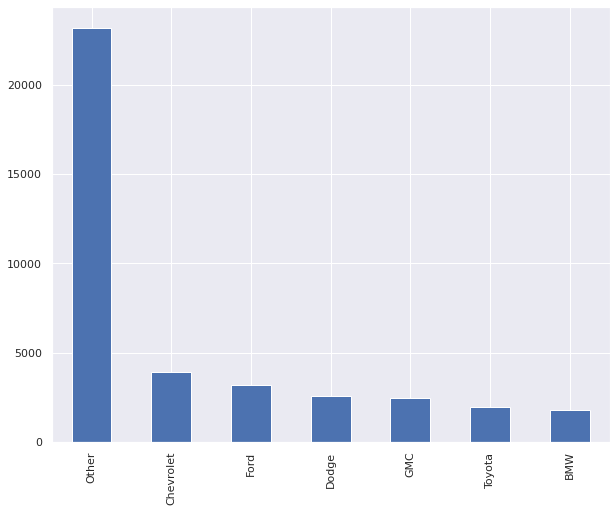

In [49]:
# Use pandas to plot the counts and visualize the first n values, n=5:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
top_n = fueleco.make.value_counts().index[:6]
fueleco.assign(make=fueleco.make.where(fueleco.make.isin(top_n), 'Other')).make.value_counts().plot.bar(ax=ax)


<AxesSubplot:xlabel='count', ylabel='make'>

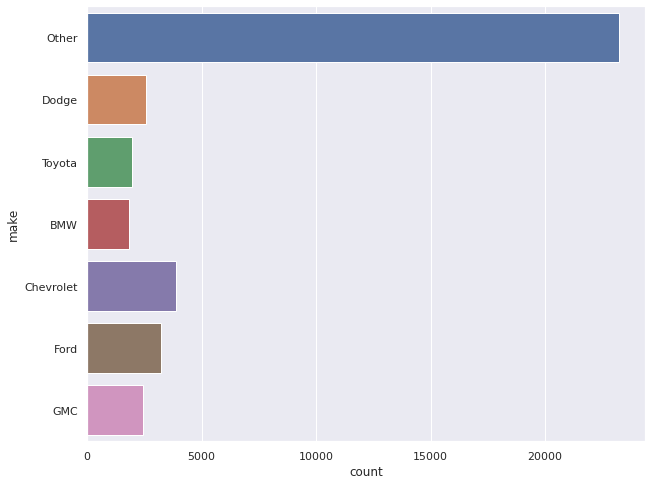

In [50]:
# Use seaborn to plot the counts and visualize them:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 8))
top_n = fueleco.make.value_counts().index[:6]
sns.countplot(y='make',     # doctest: +SKIP
  data= (fueleco
   .assign(make=fueleco.make.where(
              fueleco.make.isin(top_n),
              'Other'))
  )
)


### 3. Extra reading

#### 3.1 Plotly
https://plotly.com/

#### 3.2 Tableau
https://www.tableau.com/

#### 3.3 Power BI
https://powerbi.microsoft.com/en/

### 4.References

* https://matplotlib.org/stable/tutorials/introductory/pyplot.html
* https://seaborn.pydata.org/tutorial/introduction.html
* https://www.datacamp.com/tutorial/Introduction-to-bokeh-tutorial
* Theodore Petrou and Matt Harrison, Pandas 1.x Cookbook: Practical Recipes for Scientific Computing, Time Series Analysis, and Exploratory Data Analysis Using Python, 2nd Edition
